![Astrofisica Computacional](../../logo.png)

---
## 01.  FITS Images and the  World Coordinate System (WCS)


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this noetebook we visualize a FITS file and it will be calibrated using the  **W**orld **C**oordinate **S**ystem (WCS)

---

## 1. FITS images and the WCS

We will work with a photometric image file of the supernova remnant [Cassiopeia A](https://en.wikipedia.org/wiki/Cassiopeia_A), downloaded from the [Chandra X-ray observatory](http://chandra.harvard.edu/).

### 1.1 Reading the File

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits


hdulist = fits.open('data/casa_0.5-1.5keV.fits.gz')
hdulist.info()

Filename: data/casa_0.5-1.5keV.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (1024, 1024)   float32   


The file only contains a `PrimaryHDU` with dimensions `(1024, 1024)` of numbers of type `float32`. To access the information we do

In [2]:
image_hdu = hdulist['PRIMARY'] 

#or

image_hdu = hdulist[0] 

and through the `.data` attribute we access the information,

In [3]:
image_hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'Cassiopeia A'                                                        
DATE-OBS= '2007-12-05T22:01:59'                                                 
DATE-END= '2007-12-08T20:07:24'                                                 
LTM1_1  =                    1                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    1                                                  
LTV1    =                -36

In [4]:
image_hdu.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Note that a 2D array was obtained that can be viewed:

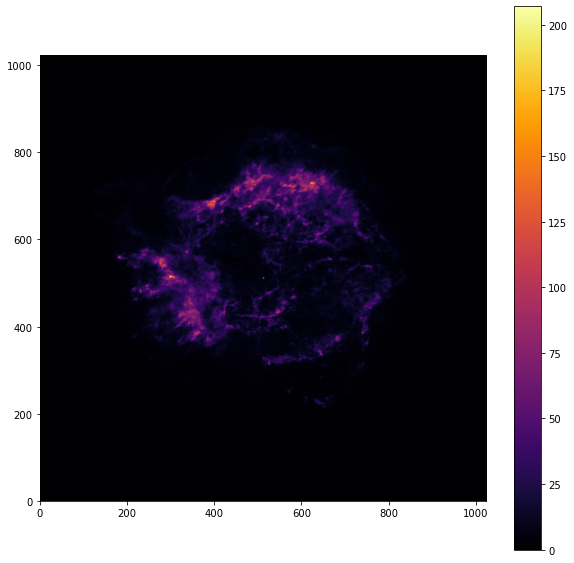

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(image_hdu.data, origin='lower', cmap='inferno')
plt.colorbar();

The additional meta-information is in the header of the primary,

In [6]:
image_hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'Cassiopeia A'                                                        
DATE-OBS= '2007-12-05T22:01:59'                                                 
DATE-END= '2007-12-08T20:07:24'                                                 
LTM1_1  =                    1                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    1                                                  
LTV1    =                -36

### 1.2 World Coordinate System (WCS)

Within the FITS standard, the World Coordinate System (WCS) is used as a mechanism to associate the physical values of the file with real positions. In this way, it is possible to convert the coordinates of the pixels in an image with celestial coordinates such as right ascension (RA) and declination (dec).

The information contained in the header allows you to create the transformation from pixel coordinates to celestial coordinates using [astropy.wcs.WCS](http://docs.astropy.org/en/stable/api/astropy.wcs.WCS.html# astropy.wcs.WCS):

In [7]:
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

wcs = WCS(image_hdu.header)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 350.8841248  58.78133011  
CRPIX : 445.5  289.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001366666693  0.0001366666693  
NAXIS : 1024  1024


Using the methods [SkyCoord.to_pixel()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.to_pixel) and [SkyCood.from_pixel() ](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.from_pixel), it is possible to convert each position of the image to the corresponding coordinates in the sky . For example, the pixel located at [0,0] will have coordinates

In [8]:
SkyCoord.from_pixel(0, 0, wcs)

<SkyCoord (ICRS): (ra, dec) in deg
    (351.00119731, 58.74184873)>

The coordinates of the supernova remnant can be obtained by accessing the online data using the object name

In [9]:
position_casa = SkyCoord.from_name('Cas A')
position_casa

<SkyCoord (ICRS): (ra, dec) in deg
    (350.85, 58.815)>

It is also possible to record the coordinates of the object manually (Note that the [ICRS](https://en.wikipedia.org/wiki/International_Celestial_Reference_System_and_Frame) system is used)

In [10]:
position_casa = SkyCoord('23h23m27.94s', '+58d48m42.4s', frame='icrs')
position_casa

<SkyCoord (ICRS): (ra, dec) in deg
    (350.86641667, 58.81177778)>

When comparing these results with the one obtained for the pixel (0,0), it can be seen that they do not coincide exactly. This means that the coordinates of the object correspond to another pixel in the image. To find out which one we do:

In [11]:
#position_casa = SkyCoord('23h23m27.94s', '+58d48m42.4s', frame='icrs')

# or

position_casa = SkyCoord.from_name('Cas A')

position_casa.to_pixel(wcs)

(array(573.79215824), array(534.89801134))

## 2. Visualización de imágenes en el cielo

Astropy provides a helper module [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/) to simplify the inclusion of celestial coordinates in the Matplotlib plot.

To use it, you just need to pass the `projection=wcs` argument to the `plt.subplot()` function:

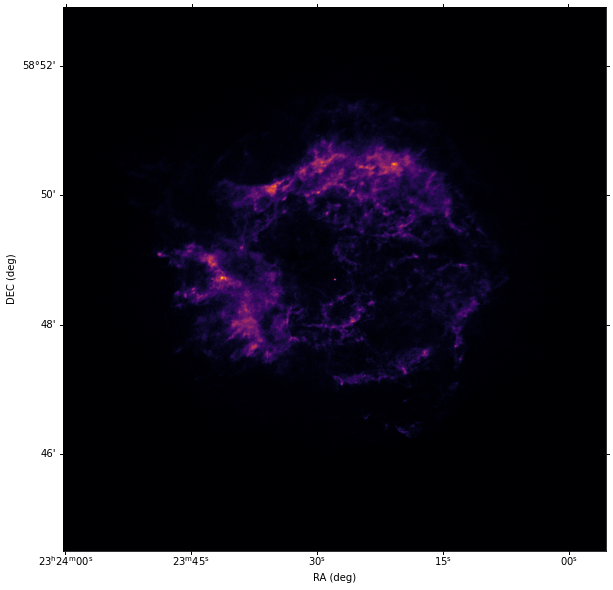

In [12]:
plt.figure(figsize=(10,10))
ax = plt.subplot(projection=wcs)
ax.imshow(image_hdu.data, cmap='inferno', origin='lower')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

Adding a coordinate grid, `ax.grid()`, gives

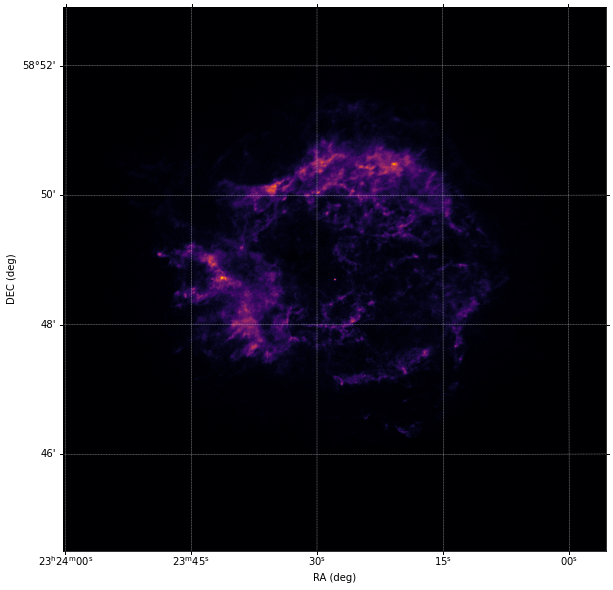

In [13]:
ax.grid(linewidth=0.3, linestyle='dashed', color='white')
ax.figure

Now, with a white cross, the position of `'Cas A'` will be indicated:

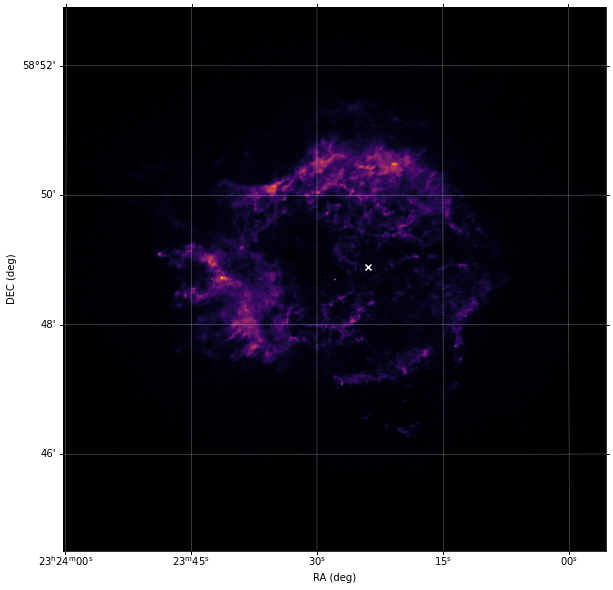

In [14]:
ra = position_casa.icrs.ra.deg
dec = position_casa.icrs.dec.deg
ax.scatter(ra, dec, transform=ax.get_transform('icrs'), color='white', marker='x')
ax.figure

It is also possible to add geometric shapes to illustrate regions of interest,

In [ ]:
from matplotlib.patches import Circle
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy import units as u

In [ ]:
# transform to pixel coordinates
xy = ax.wcs.world_to_pixel(position_casa)
pixel_size = proj_plane_pixel_scales(wcs)[0] * u.deg
radius = 2.3 * u.arcmin / pixel_size

In [ ]:
circle = Circle(
    xy=xy,
    radius=radius.to_value(""),
    edgecolor="w",
    facecolor="None"
)
ax.add_patch(circle)
ax.figure

For complete information on more complex shapes and region handling in graphs, you can check out the [regions](https://astropy-regions.readthedocs.io/en/stable/) package.